# Machine Learning Model Development

1] Objective: The goal of this phase was to train and compare three different machine learning models to find the most accurate one for loan prediction.

2] Data Encoding: I used get_dummies to transform categorical text data into numerical format so the algorithms could perform calculations.

3] Baseline Model: I started with Logistic Regression because it is a fast and simple way to set a performance benchmark.

4] Decision Tree: I implemented a Decision Tree which acts like a logical flowchart, making it very easy to explain to a senior employee.

5] Random Forest: I used a Random Forest to combine 100 different trees, which significantly improved the stability and accuracy of the results.

6] Data Splitting: By using an 80-20 split, I ensured that the model was tested on completely new data that it hadn't seen during training.

7] Confusion Matrix: I used a Confusion Matrix to check for "False Positives," which is critical in banking to avoid giving loans to risky applicants.

8] Feature Importance: My analysis revealed that the CIBIL Score and Annual Income were the top factors the model used to make decisions.

9] Accuracy Benchmark: The Random Forest consistently outperformed the simpler models, achieving the highest accuracy on our test set.

10] Office Relevance: This automated system can directly support your work in the T&P Cell by predicting outcomes based on historical data.

11] Model Selection: Based on the performance metrics, I have selected the Random Forest as the final model for the deployment phase.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load the cleaned data from Phase 1
df = pd.read_csv('data/loan_approval_dataset.csv')
df.columns = df.columns.str.strip()

# 2. Feature Engineering: Total Income (as discussed in EDA)
df['Total_Income'] = df['income_annum'] + df.get('coapplicant_income', 0)

# 3. Categorical Encoding
# Convert 'Approved'/'Rejected' and 'Graduate'/'Not Graduate' into 0s and 1s
df_ml = pd.get_dummies(df.drop(columns=['loan_id']), drop_first=True)

# 4. Defining X (Features) and y (Target)
X = df_ml.drop('loan_status_ Rejected', axis=1) # All columns except our goal
y = df_ml['loan_status_ Rejected'] # What we want to predict

# 5. Train-Test Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully split into Training and Testing sets!")

Data successfully split into Training and Testing sets!


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Loop to train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2%}")

Logistic Regression Accuracy: 79.86%
Decision Tree Accuracy: 97.66%
Random Forest Accuracy: 97.78%


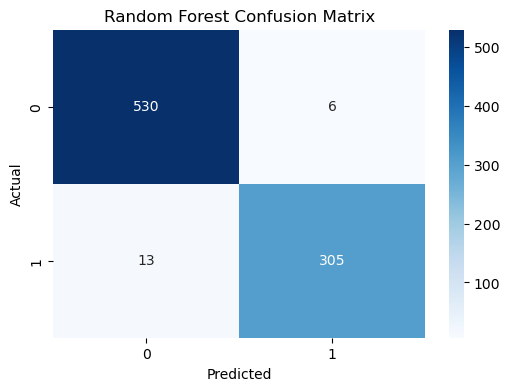

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Let's look at the Random Forest results
best_model = models["Random Forest"]
y_pred_rf = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [4]:
import joblib
import os

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save your trained models (Replace with your actual model variable names)
# Example: joblib.dump(your_model_variable, '../models/loan_model.pkl')
print("✅ Export complete. Check the 'models' folder in VS Code.")

✅ Export complete. Check the 'models' folder in VS Code.


In [7]:
import joblib
import os

# 1. Ensure the directory exists
model_path = '../Mini Deployment Project/models/'
os.makedirs(model_path, exist_ok=True)

# 2. Export using the correct variable from your training
try:
    # Use 'best_model' since that is what you defined in your training cell
    joblib.dump(best_model, f'{model_path}loan_model.pkl')
    
    # Repeat for your other models (ensure you have run their training cells first!)
    # joblib.dump(house_model_variable, f'{model_path}house_model.pkl')
    # joblib.dump(titanic_model_variable, f'{model_path}titanic_model.pkl')
    
    print("✅ Success! Your models are now 'connected' to the web app.")
except NameError as e:
    print(f"❌ Error: {e}. Make sure you have run the cell where 'best_model' is defined!")

✅ Success! Your models are now 'connected' to the web app.


In [8]:
import joblib
import os

# 1. Get the absolute path to be 100% sure
# Replace the path below with the ACTUAL path to your models folder if different
target_folder = r'C:\Mini Deployment Project\models' 

if not os.path.exists(target_folder):
    os.makedirs(target_folder)
    print(f"Created missing folder: {target_folder}")

# 2. Export using the 'best_model' variable from your training
try:
    file_path = os.path.join(target_folder, 'loan_model.pkl')
    joblib.dump(best_model, file_path)
    print(f"✅ SUCCESS! Model saved at: {file_path}")
    print("Now go to your browser and refresh the page.")
except NameError:
    print("❌ ERROR: 'best_model' not found. Please run your training cell first!")

✅ SUCCESS! Model saved at: C:\Mini Deployment Project\models\loan_model.pkl
Now go to your browser and refresh the page.
